In [1]:
import numpy as np
import pandas as pd
import random as rd
from matplotlib import pyplot as plt
from utils import *
from copy import deepcopy as deepcopy

# Génération de villes aléatoires

In [107]:
n=100

In [108]:
#names, villes, matriceDistance = generationProblemeCercle(n)
names, villes, matriceDistance = generationProbleme(n)

# Vizualization d'une solution

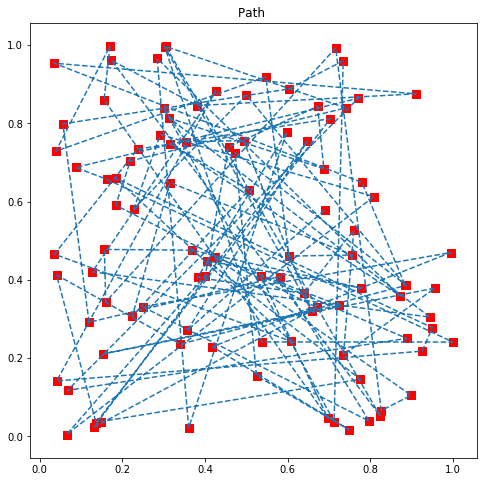

0.5344917119836508

In [109]:
solution = [i for i in range(n)]
vizuResult(solution,villes)
poidsSolution(solution, matriceDistance)

# Construction Solution

In [110]:
liste = [int(name) for name in names]
solutionConstruite = [0]
liste.remove(0)
while len(liste)>0:
    u = solutionConstruite[-1]
    v = liste[-1]
    distance = float("inf")
    for w in liste:
        if matriceDistance[str(u)][str(w)] < distance:
            distance = matriceDistance[str(u)][str(w)]
            v = w
    solutionConstruite.append(v)
    liste.remove(v)
    

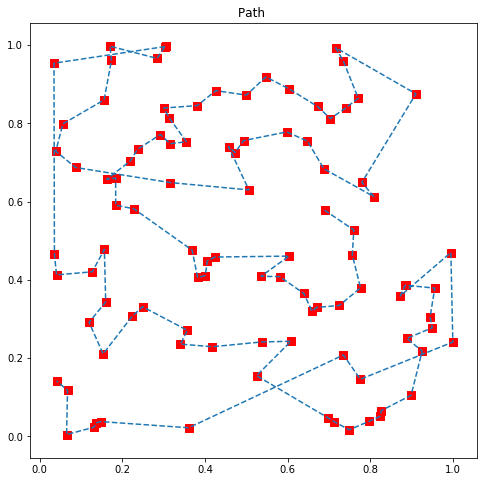

0.09591203142365722

In [111]:
vizuResult(solutionConstruite,villes)
poidsSolution(solutionConstruite, matriceDistance)

# Canvas Classique du Recuit Simulé

In [112]:
def ameliorationSolution(niter,s0, generate, matriceDistance,T):
    s = deepcopy(s0)
    cout = poidsSolution(s,matriceDistance)
    couts = [cout]
    for n in range(niter):
        setoile = generate(s,matriceDistance)
        delta = poidsSolution(setoile,matriceDistance) - cout
        if delta < 0:
            s = setoile
            cout = poidsSolution(s,matriceDistance)
        else:
            a = rd.random()
            if a < np.exp(-delta/T(n)):
                s = setoile
                cout = poidsSolution(s,matriceDistance)
        couts.append(cout)
    return s,couts

In [113]:
def simuationRecuit(s0, niter, generate, matriceDistance, Temperature, villes):
    setoile, coutsetoile = ameliorationSolution(niter, s0,generate,matriceDistance,Temperature)
    vizuResult(setoile,villes)
    vizuEvolution(coutsetoile)
    poids = coutsetoile[-1]
    return setoile, poids

# Temperatures

In [114]:
def Tgeom(n,alpha=.6):
    return max(100 *  (alpha**(n+1)), 10**(-18))
def Tlog(n):
    return 1 / np.log(n+2)
def Tlin(n):
    return 1 / (n+1)

In [187]:
nmax = 1000
ns = []
ts = []
i=0
Tchaud, Tgel=1, 10**(-5)
while np.exp(i)<nmax:
    ns.append(np.exp(i))
    #ts.append(Tchaud - (Tchaud-Tgel)*i)
    i+=1
ns.append(nmax)
k=0
for j in range(nmax):
    if j < ns[k]:
        ts.append(Tchaud - (Tchaud-Tgel)*k/len(ns))
    else:
        k+=1
        ts.append(Tchaud - (Tchaud-Tgel)*k/len(ns))

In [188]:
def Tpalier(n,ts=ts):
    return ts[n]

In [195]:
T = [i for i in range(20)]
Tg, Tlo, Tli, Tp = [Tgeom(t) for t in T], [Tlog(t) for t in T], [Tlin(t) for t in T], [Tpalier(t) for t in T]

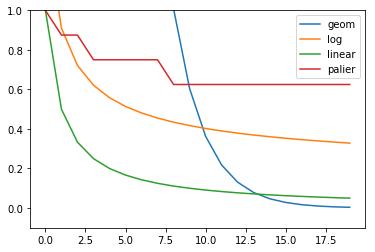

In [196]:
plt.plot(T,Tg, label="geom")
plt.plot(T,Tlo, label="log")
plt.plot(T,Tli, label="linear")
plt.plot(T,Tp, label="palier")
plt.legend()
plt.ylim(-.1,1)
plt.show()

# Génération d'une solution aléatoire

In [115]:
def generationAleatoire(s,matriceDistance):
    return np.random.permutation(s)

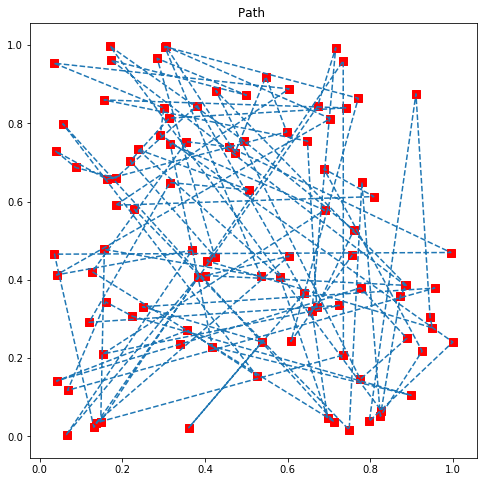

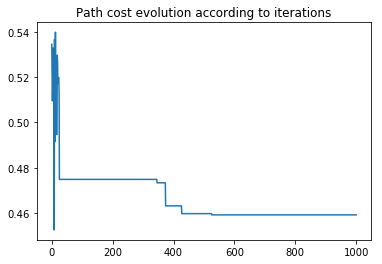

In [116]:
aleatoire = simuationRecuit(solution, 1000, generationAleatoire,matriceDistance, Tgeom, villes)

# Génération décroisement

In [117]:
def generationDecroisement(s,matriceDistance):
    n = max(s)
    while True:
        i = rd.randint(0,n)
        j = rd.randint(0,n)
        if i < j:
            break
    setoile = deepcopy(s)
    for k in range(j-i + 1):
        setoile[i + k] = s[j-k]
    return setoile

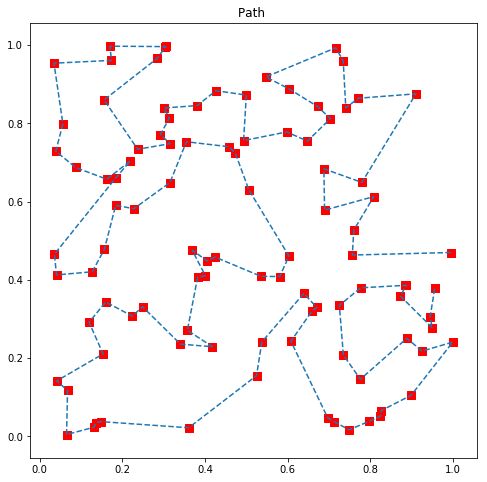

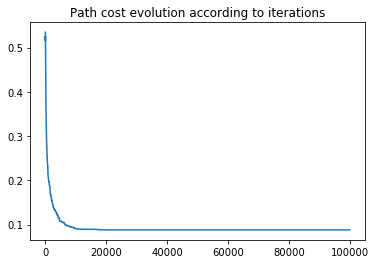

In [120]:
decroisement = simuationRecuit(solution, 100000, generationDecroisement,matriceDistance, Tgeom, villes)

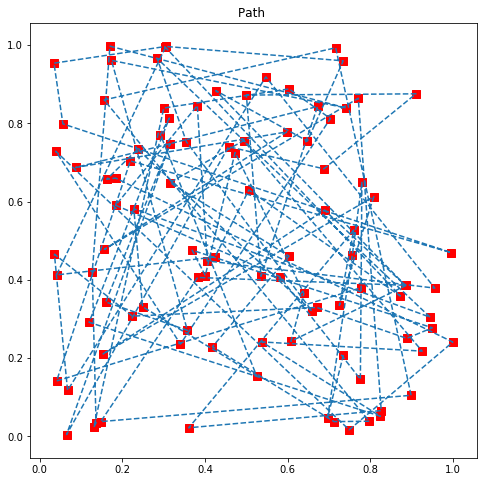

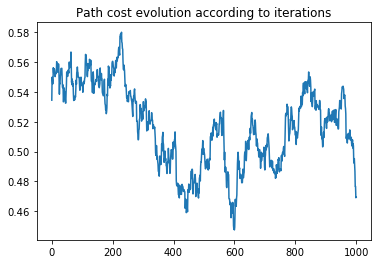

In [190]:
decroisement = simuationRecuit(solution, 1000, generationDecroisement,matriceDistance, Tpalier, villes)